[[4.5]
 [0.8]]


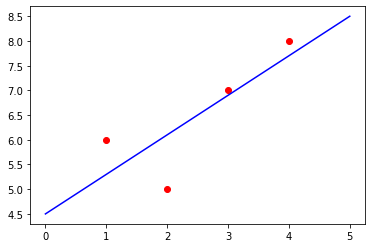

In [2]:
import numpy as np
import matplotlib.pyplot as plt
input = np.array([
    [1, 6],
    [2, 5],
    [3, 7],
    [4, 8]
])
m = np.shape(input)[0]
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(betaHat)
plt.figure(1)
xx = np.linspace(0, 5, 2)
yy = np.array(betaHat[0] + betaHat[1] * xx)
plt.plot(xx, yy.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()

In [17]:
#Matrix Completion
import numpy as np
 
class MF():
 
    def __init__(self, X, k, alpha, beta, iterations):
        """
        Perform matrix factorization to predict np.nan entries in a matrix.
        Arguments
        - X (ndarray)   : sample-feature matrix
        - k (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
 
        self.X = X
        self.num_samples, self.num_features = X.shape
        self.k = k
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        # True if not nan
        self.not_nan_index = (np.isnan(self.X) == False)
 
    def train(self):
        # Initialize factorization matrix U and V
        self.U = np.random.normal(scale=1./self.k, size=(self.num_samples, self.k))
        self.V = np.random.normal(scale=1./self.k, size=(self.num_features, self.k))
 
        # Initialize the biases
        self.b_u = np.zeros(self.num_samples)
        self.b_v = np.zeros(self.num_features)
        self.b = np.mean(self.X[np.where(self.not_nan_index)])
        # Create a list of training samples
        self.samples = [
            (i, j, self.X[i, j])
            for i in range(self.num_samples)
            for j in range(self.num_features)
            if not np.isnan(self.X[i, j])
        ]
 
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            # total square error
            se = self.square_error()
            training_process.append((i, se))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, se))
 
        return training_process
 
    def square_error(self):
        """
        A function to compute the total square error
        """
        predicted = self.full_matrix()
        error = 0
        for i in range(self.num_samples):
            for j in range(self.num_features):
                if self.not_nan_index[i, j]:
                    error += pow(self.X[i, j] - predicted[i, j], 2)
        return error
 
    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, x in self.samples:
            # Computer prediction and error
            prediction = self.get_x(i, j)
            e = (x - prediction)
 
            # Update biases
            self.b_u[i] += self.alpha * (2 * e - self.beta * self.b_u[i])
            self.b_v[j] += self.alpha * (2 * e - self.beta * self.b_v[j])
 
            # Update factorization matrix U and V
            """
            If RuntimeWarning: overflow encountered in multiply,
            then turn down the learning rate alpha.
            """
            self.U[i, :] += self.alpha * (2 * e * self.V[j, :] - self.beta * self.U[i,:])
            self.V[j, :] += self.alpha * (2 * e * self.U[i, :] - self.beta * self.V[j,:])
 
    def get_x(self, i, j):
        """
        Get the predicted x of sample i and feature j
        """
        prediction = self.b + self.b_u[i] + self.b_v[j] + self.U[i, :].dot(self.V[j, :].T)
        return prediction
 
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, U and V
        """
        return self.b + self.b_u[:, np.newaxis] + self.b_v[np.newaxis, :] + self.U.dot(self.V.T)
 
    def replace_nan(self, X_hat):
        """
        Replace np.nan of X with the corresponding value of X_hat
        """
        X = np.copy(self.X)
        for i in range(self.num_samples):
            for j in range(self.num_features):
                if np.isnan(X[i, j]):
                    X[i, j] = X_hat[i, j]
        return X
 
if __name__ == '__main__':
    X = np.array([
        [8, 3, 0, 1],
        [4, 0, 0, 1],
        [0, 1, 0, 5],
        [1, 0, 0, 5],
        [1, 1, 3, 4],
    ], dtype=np.float)
    # replace 0 with np.nan
    X[X == 0] = np.nan
    print(X)
    # np.random.seed(1)
    mf = MF(X, k=2, alpha=0.1, beta=0.1, iterations=100)
    mf.train()
    X_hat = mf.full_matrix()
    X_comp = mf.replace_nan(X_hat)
 
    print(X_hat)
    print(X_comp)

[[ 8.  3. nan  1.]
 [ 4. nan nan  1.]
 [nan  1. nan  5.]
 [ 1. nan nan  5.]
 [ 1.  1.  3.  4.]]
Iteration: 10 ; error = 0.0745
Iteration: 20 ; error = 0.2002
Iteration: 30 ; error = 0.1471
Iteration: 40 ; error = 0.0313
Iteration: 50 ; error = 0.0607
Iteration: 60 ; error = 0.0374
Iteration: 70 ; error = 0.0370
Iteration: 80 ; error = 0.3415
Iteration: 90 ; error = 0.2150
Iteration: 100 ; error = 0.0656
[[7.78570694 2.96701849 3.60711052 0.98413773]
 [3.97048076 1.33358354 2.30932753 1.03942634]
 [0.61017916 1.07576968 3.3643118  4.97756039]
 [1.03392086 1.49954502 3.59704192 4.99100031]
 [1.06813392 1.05919625 2.99134067 3.98498756]]
[[8.         3.         3.60711052 1.        ]
 [4.         1.33358354 2.30932753 1.        ]
 [0.61017916 1.         3.3643118  5.        ]
 [1.         1.49954502 3.59704192 5.        ]
 [1.         1.         3.         4.        ]]


In [5]:
#Nonnegative Matrix Factorization
import numpy
 
def matrix_factorisation(R, P, Q, K, steps=100, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

R = [
     [8,3,0,1],
     [4,0,0,1],
     [0,1,0,5],
     [1,0,0,5],
     [1,1,3,4],
    ]
 
R = numpy.array(R)
 
N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)
 
nP, nQ = matrix_factorisation(R, P, Q, K)
nR = numpy.dot(nP, nQ.T)
print(nR)

[[1.88889485 1.1788788  1.39279584 1.77080148]
 [1.87611862 1.16646546 1.38159003 1.75919414]
 [0.93459137 0.78800979 0.77144813 0.85909339]
 [1.44931608 0.41424679 0.87152598 1.39957989]
 [1.66029357 0.66411901 1.07461967 1.58751294]]


array([[0.08990026, 0.11764833],
       [0.11764833, 0.15396094]])

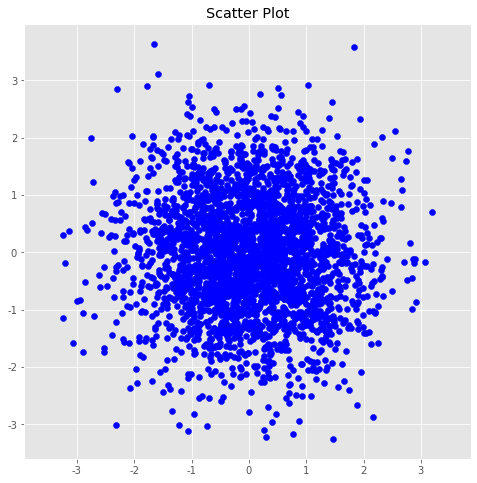

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(8,8)

#Take 3000 data from each standard normal distribution
x1=np.random.normal(0,1,3000)
x2=np.random.normal(0,1,3000)

# arrange x1 and x2 as vectors
X=np.vstack((x1,x2)).T

plt.scatter(X[:,0],X[:,1],color="blue")
plt.title("Scatter Plot")
plt.axis('equal')
plt.show

#Calculate covariance
def cov(x1,x2):
    x1mean,x2mean=x1.mean(),x2.mean()
    Sigma=np.sum((x1-x1mean)*(x2-x2mean))/(len(x1)-1)
    return Sigma

#Covariance matrix
def covMatrix(X):
    matrix=np.array([[cov(X[0],X[0]),cov(X[0],X[1])],[cov(X[1],X[0]),cov(X[1],X[1])]])
    return matrix

covMatrix(X)

[[2.87931922 3.62762192]
 [3.62762192 4.57040008]]
[[0.00297968 0.00219095]
 [0.00219095 0.001611  ]]


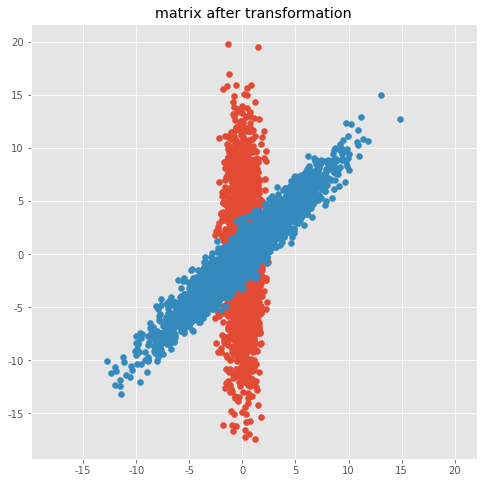

In [22]:
#Linear transformation:
def linear_trans(X,sx,sy,theta):
    X = X-np.mean(X,0)
    
    S=np.array([[sx,0],[0,sy]])
    R=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    Y=X.dot(S)
    A=S @ R 
    
    plt.scatter(Y[:,0],Y[:,1])
    plt.scatter(X.dot(A)[:,0],X.dot(A)[:,1])
    plt.title("matrix after transformation")
    plt.axis('equal')
    plt.show
    return Y,X.dot(A)

Y,SIGMA=linear_trans(X,0.8,5.4,0.25*np.pi)
print(covMatrix(Y))
print(covMatrix(SIGMA))